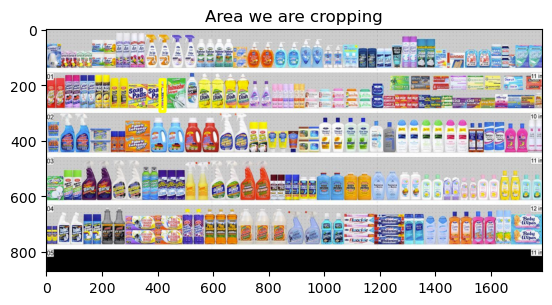

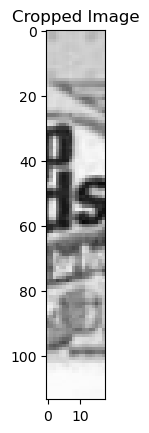

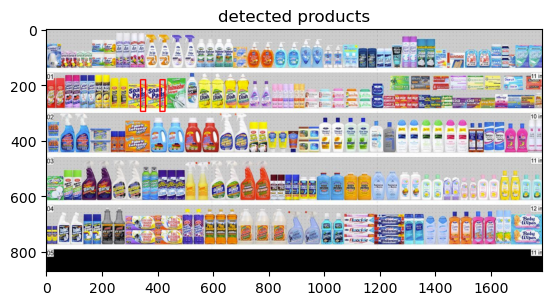

In [38]:
import cv2 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "", image = None):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

img_rgb = cv.imread('C:/Users/Emelin/Desktop/images/shop.png')
#assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

height, width = img_rgb.shape[:2]

start_row, start_col = int(height * .21), int(width * .23)
end_row, end_col = int(height * .34), int(width * .24)
cropped = img_rgb[start_row:end_row , start_col:end_col]

copy = img_rgb.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,255,255), 10)
imshow("Area we are cropping", copy)

template= cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

imshow("Cropped Image", template) 
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv.imwrite('res.png',img_rgb)

imshow("detected products", img_rgb) 

In [39]:
height, width = img_rgb.shape[:2]
print('Height of Image: {} pixels'.format(int(img_rgb.shape[0])))
print('Width of Image: {} pixels'.format(int(img_rgb.shape[1])))

Height of Image: 871 pixels
Width of Image: 1786 pixels


In [40]:
f = set()

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

    sensitivity = 100
    f.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

cv2.imwrite('res.png',img_rgb)

found_count = len(f)

In [41]:
print('number of products:',found_count)

number of products: 2


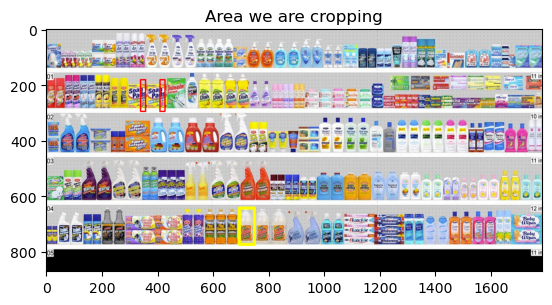

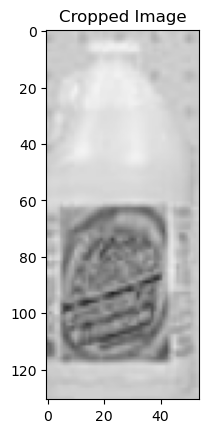

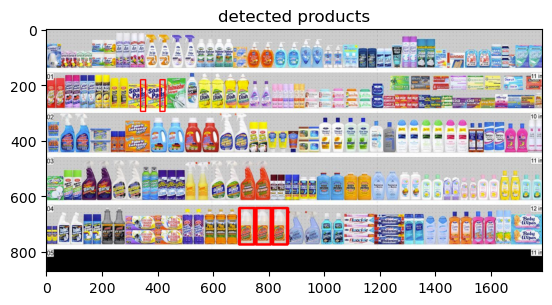

In [42]:
height, width = img_rgb.shape[:2]

start_row, start_col = int(height * .74), int(width * .39)
end_row, end_col = int(height * .89), int(width * .42)
cropped2 = img_rgb[start_row:end_row , start_col:end_col]

copy = img_rgb.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,255,255), 10)
imshow("Area we are cropping", copy)

template2= cv2.cvtColor(cropped2, cv2.COLOR_BGR2GRAY)

imshow("Cropped Image", template2) 
w2, h2 = template2.shape[::-1]
res2 = cv.matchTemplate(img_gray,template2,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc2 = np.where( res2 >= threshold)
for pt in zip(*loc2[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w2, pt[1] + h2), (0,0,255), 2)
cv.imwrite('res2.png',img_rgb)

imshow("detected products", img_rgb) 

In [43]:
f2 = set()

for pt in zip(*loc2[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w2, pt[1] + h2), (0,0,255), 2)

    sensitivity = 100
    f2.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

cv2.imwrite('res2.png',img_rgb)

found_count_2 = len(f2)

print('number of products(2):',found_count_2)

number of products(2): 2
